In [4]:
!pip install kaggle
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [9]:
import json
token = {"username":"fatemehy","key":"e6177841494493a99d3da8b61bab2fb1"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

- path is now set to: {/content}
ref                                                             title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge               COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-10 00:09:23           2985  
roche-data-science-coalition/uncover                            UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53           3209  
kwullum/fatal-police-shootings-in-the-us                        Fatal Police Shootings in the US                      1MB  2017-09-22 19:18:21          15296  
Cornell-University/arxiv                                        ArXiv Metadata                                        2GB  2020-05-06 23:18:35             70  
yash612

In [10]:
!kaggle datasets list -s productdemandforecasting
!kaggle datasets download -d felixzhao/productdemandforecasting     -p /content
!unzip \*.zip

ref                                 title                         size  lastUpdated          downloadCount  
----------------------------------  ----------------------------  ----  -------------------  -------------  
felixzhao/productdemandforecasting  Forecasts for Product Demand   5MB  2017-08-25 02:42:57           7343  
productdemandforecasting.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  productdemandforecasting.zip
replace Historical Product Demand.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [29]:
# Load data into Pandas Dataframe
import pandas as pd
df = pd.read_csv('Historical Product Demand.csv')
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [30]:
#Does the dataset include any missing values? If so, delete the missing values entries
df.isnull().sum(axis = 0)

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [31]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Product_Code'])
df['Product_Code']= encoder.transform(df['Product_Code'])

encoder.fit(df['Warehouse'])
df['Warehouse']= encoder.transform(df['Warehouse'])

encoder.fit(df['Product_Category'])
df['Product_Category']= encoder.transform(df['Product_Category'])

df['year'] = pd.DatetimeIndex(df['Date']).year


df['month'] = pd.DatetimeIndex(df['Date']).month
del df['Date']
# df=df.drop(df['Date'])
df.head()


#Target Feature - Order_Demand
#Removing () from the target feature.
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")

#Next step is to change the data type.
df['Order_Demand'] = df['Order_Demand'].astype('int64')

df.dropna()

,Product_Code,Warehouse,Product_Category,Order_Demand,year,month
0,982,2,27,100,2012.0,7.0
1,968,2,27,500,2012.0,1.0
2,968,2,27,500,2012.0,2.0
3,968,2,27,500,2012.0,2.0
4,968,2,27,500,2012.0,3.0
...,...,...,...,...,...,...
1048570,1780,2,5,1000,2016.0,4.0
1048571,1962,2,5,1,2016.0,4.0
1048572,1776,2,5,2500,2016.0,4.0
1048573,890,2,22,50,2016.0,10.0


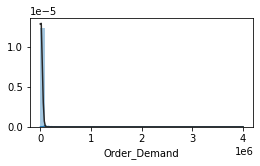

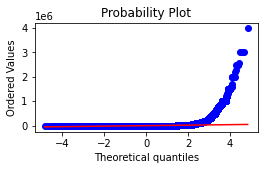

In [32]:
#Lets check the ditribution of the target variable (Order_Demand)
from matplotlib import rcParams
import seaborn as sb
from scipy.stats import norm,probplot
# figure size in inches
rcParams['figure.figsize'] = 4,2

sb.distplot(df['Order_Demand'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = probplot(df['Order_Demand'], plot=plt)
plt.show()

33


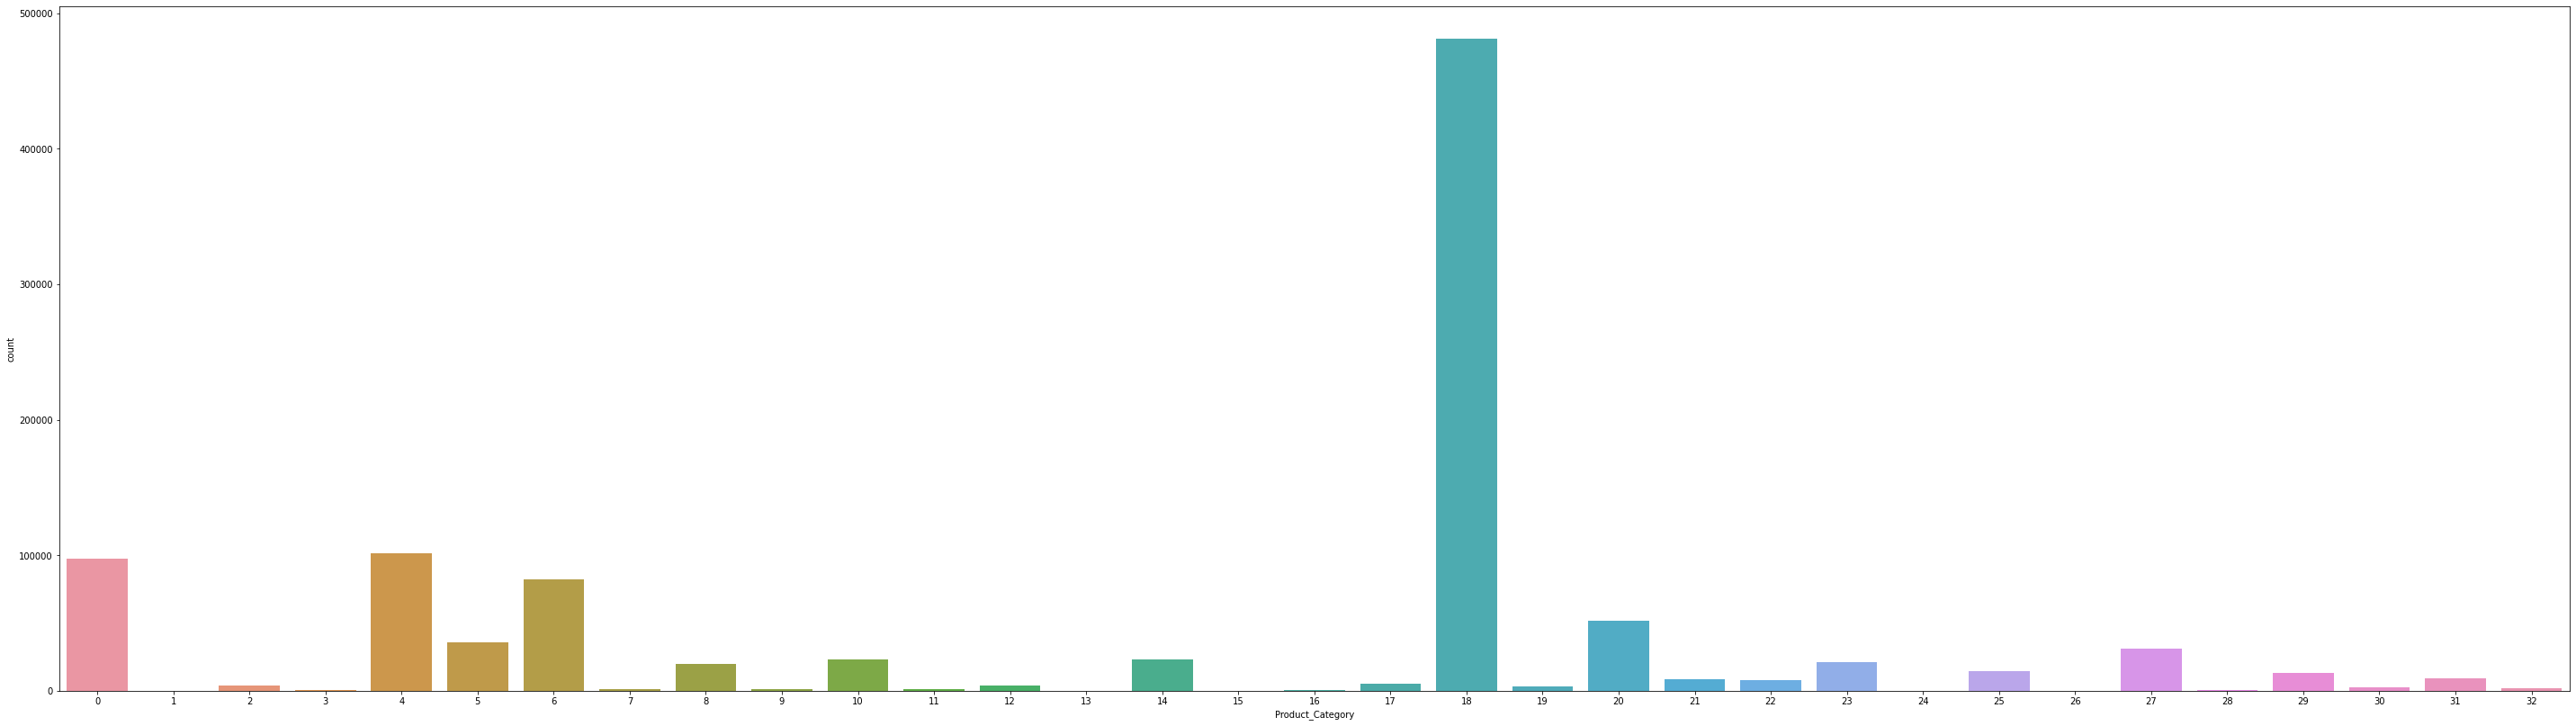

In [33]:
#Product Category.
import seaborn as sb
from matplotlib import rcParams
print (len(df['Product_Category'].value_counts()))

rcParams['figure.figsize'] = 50,14
sb.countplot(df['Product_Category'].sort_values(ascending = True))

#There's a lot of orders on category19.

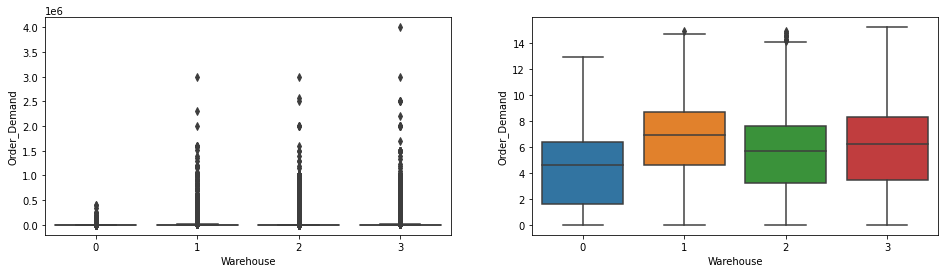

In [34]:
#Lets check the orders by warehouse.
import matplotlib.pyplot as plt
import numpy as np
#Checking with Boxplots
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16,4
f, axes = plt.subplots(1, 2)
#Regular Data
fig3 = sb.boxplot( df['Warehouse'],df['Order_Demand'], ax = axes[0])
#Data with Log Transformation
fig4 = sb.boxplot( df['Warehouse'], np.log1p(df['Order_Demand']),ax = axes[1])

# del fig3, fig4

In [39]:
a=df[df.columns[0:]].corr() ['Order_Demand'][:]
a
# result=a[abs(a)>0.6]
# result

Product_Code        0.030940
Warehouse           0.058026
Product_Category    0.053335
Order_Demand        1.000000
year                0.008249
month              -0.000642
Name: Order_Demand, dtype: float64

In [40]:
new_index=['Order_Demand','Product_Code'	,'Warehouse'	,'Product_Category'	,'year'	,'month']
df=df.reindex(columns=new_index)

In [ ]:
import numpy as np
df.describe
# df=df.drop(['Date'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(df.iloc[:,1:5])
y = (df.iloc[:, 0].values)
print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1) 

[ 100  500  500 ... 2500   50    4]


In [41]:
df.dropna
df.drop_duplicates
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np
# df=np.nan_to_num(df)
df.describe
# df=df.drop(['Date'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,1:])
X=np.nan_to_num(X)
X[np.isinf(X)]=0
# X=np.asarray(X,dtype=int)
y = df.iloc[:, 0].values
# print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1) 

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(10,50,5)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print ('best score and parameter: ',clf.best_score_, clf.best_params_) 
r2_score(y_test, clf.best_estimator_.predict(X_test))


best score and parameter:  0.1376719501265043 {'max_depth': 10}


0.26935522536163625

In [ ]:

df.dropna
df.drop_duplicates

import numpy as np
# df=np.nan_to_num(df)
df.describe
# df=df.drop(['Date'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,1:])
X=np.nan_to_num(X)
X[np.isinf(X)]=0
# X=np.asarray(X,dtype=int)
y = df.iloc[:, 0].values
# print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1) 



from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mse', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mae', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))



from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='rbf', gamma='auto', epsilon=0.1).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='linear', gamma='auto', epsilon=0.1).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))


from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='poly', gamma='auto', epsilon=0.1).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='sigmoid', gamma='auto', epsilon=0.1,degree=3).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='precomputed', gamma='auto', epsilon=0.1).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))



MSE: 522936542.22818935
MAE: 4472.402297465211
r2_score: 0.3613849762977438
